<a href="https://colab.research.google.com/github/20BCS6894/MainRepo/blob/main/LogisticRegressionWS_sumit6894.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

In [ ]:
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head(7)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [ ]:
#Finding info about dataset and its shape 

In [ ]:
diabetes_data.shape
#DATA SET HAS 768 rows and 9 columns

(768, 9)

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#corr column wise
diabetes_data.corr().Outcome.sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

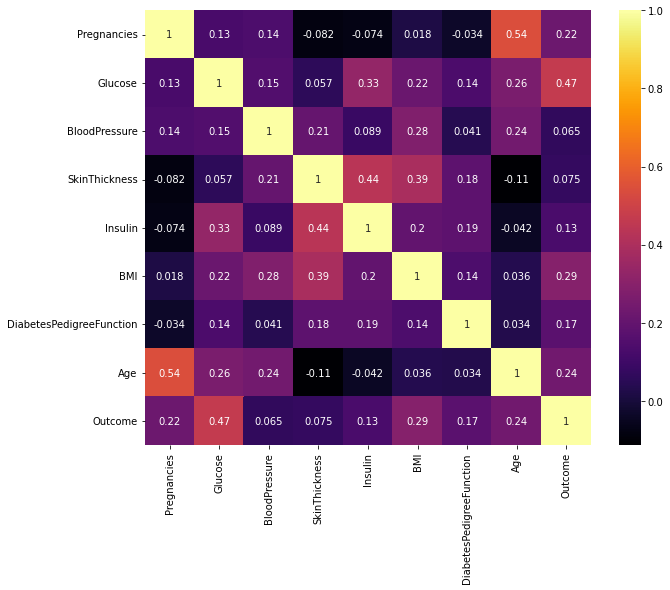

In [ ]:
#using heat map to visualize correlation b/w cols
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(diabetes_data.corr(), cmap="inferno", annot=True , ax=ax)
plt.show()

In [ ]:
hist_plot = px.histogram(diabetes_data, x="Age",marginal="box")
hist_plot.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



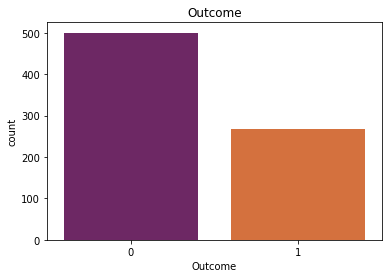

In [ ]:
#visualizing outcome cols 0/1 s
sns.countplot(diabetes_data.Outcome, palette="inferno")
plt.title("Outcome")
plt.show()

In [ ]:
f = px.histogram(diabetes_data, x=diabetes_data[diabetes_data.Outcome==0].Age, marginal="box", color_discrete_sequence=['red'])
f.show()
#age vs outcome 0

In [ ]:
f2 = px.histogram(diabetes_data, x=diabetes_data[diabetes_data.Outcome==1].Age, marginal="box", color_discrete_sequence=['lightblue'])
f2.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



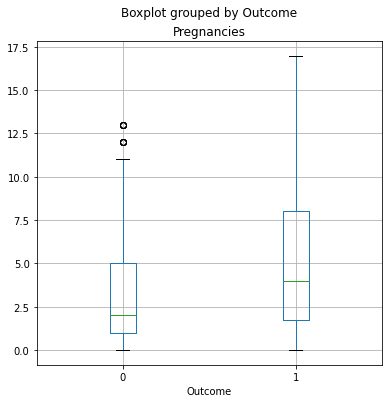

In [ ]:
diabetes_data.boxplot(figsize=(6,6),column='Pregnancies',by ='Outcome')
plt.show()
#pregrnancy vs outcome boxplot

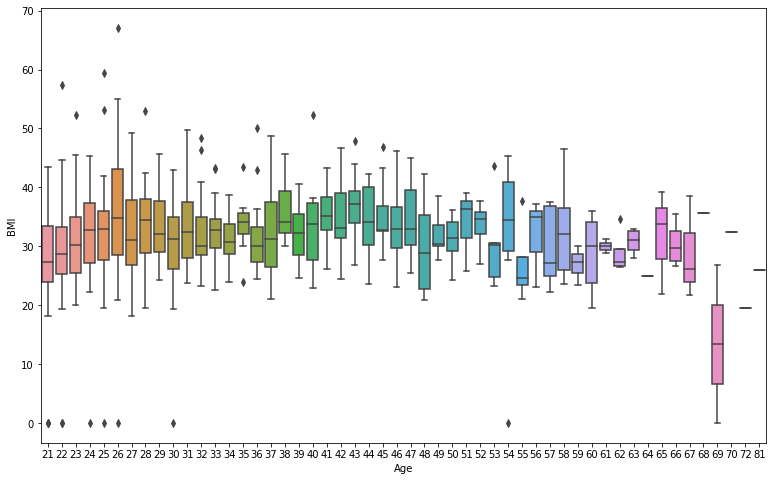

In [ ]:
plt.subplots(figsize=(13,8))
sns.boxplot(x='Age', y='BMI', data=diabetes_data)
plt.show()

In [ ]:
#BUILDING MODEL

In [ ]:
x = diabetes_data.drop(['Outcome'], axis = 1)
y = diabetes_data.loc[:,"Outcome"].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [ ]:
logregx = linear_model.LogisticRegression(max_iter=150)

logregx.fit(x_train,y_train)

In [ ]:
print("Model accuracy for testing is " ,logregx.score(x_test, y_test))


Model accuracy for testing is  0.7913385826771654


In [ ]:
print("Model accuracy for training is " ,logregx.score(x_train, y_train))


Model accuracy for training is  0.7723735408560312



The testing score for our model is 0.79 i.e. 80% approx hence model is 
prediciting pretty accurately for test dataset and training score is 78%
**bold text**



In [ ]:
predicted_y = logregx.predict(x_test)
conf_matr = confusion_matrix(y_test,predicted_y)
conf_matr

array([[139,  18],
       [ 35,  62]])

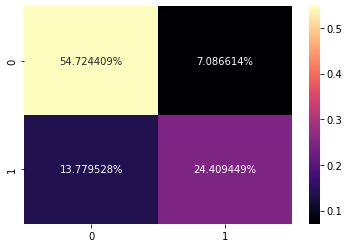

In [ ]:
sns.heatmap(conf_matr/np.sum(conf_matr), annot=True, cmap='magma',fmt = '%')
plt.show()